
Correlation Matrix:
                    Designation Factor    Salary  Experience  Publications  \
Designation Factor            1.000000 -0.950178   -0.803630     -0.084298   
Salary                       -0.950178  1.000000    0.946672      0.084482   
Experience                   -0.803630  0.946672    1.000000      0.079217   
Publications                 -0.084298  0.084482    0.079217      1.000000   
Patents                      -0.081668  0.082168    0.076751      0.995697   

                     Patents  
Designation Factor -0.081668  
Salary              0.082168  
Experience          0.076751  
Publications        0.995697  
Patents             1.000000  

Sample Faculty Data:
        Name      ID  Experience          Designation  Salary  Gender  \
0  Faculty_0  F00000          24            Professor  148000    Male   
1  Faculty_1  F00001          23            Professor  146000  Female   
2  Faculty_2  F00002           5  Associate Professor   80000  Female   
3  Faculty

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


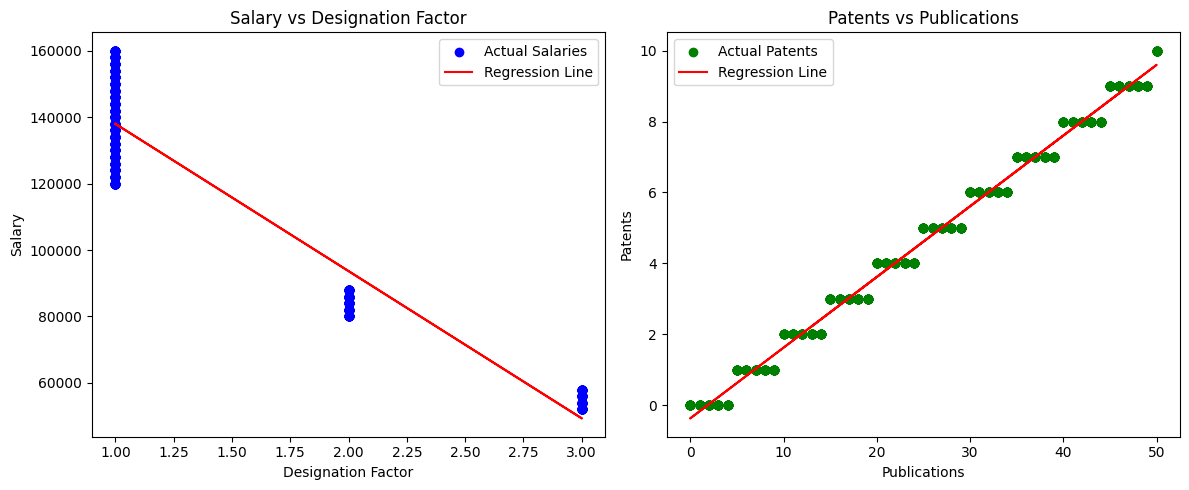

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def get_designation(experience):
    if experience < 5:
        return "Assistant Professor"
    elif experience < 10:
        return "Associate Professor"
    else:
        return "Professor"


def get_salary(designation, experience):
    if designation == "Assistant Professor":
        base_salary = 50000
    elif designation == "Associate Professor":
        base_salary = 70000
    else:  # Professor
        base_salary = 100000

    return base_salary + (experience * 2000)


def convert_designation_to_factors(designation):
    if designation == "Professor":
        return 1
    elif designation == "Associate Professor":
        return 2
    elif designation == "Assistant Professor":
        return 3
    else:
        raise ValueError("Invalid designation provided")


def generate_faculty_data(n=1000):
    faculty_list = []
    for i in range(n):
        name = f"Faculty_{i}"
        faculty_id = f"F{i:05d}"
        experience = random.randint(1, 30)
        designation = get_designation(experience)
        salary = get_salary(designation, experience)
        gender = random.choice(["Male", "Female"])
        publications = random.randint(0, 50)
        patents = publications // 5

        faculty_list.append((name, faculty_id, experience, designation, salary, gender, publications, patents))

    return faculty_list


def prepare_data_for_regression(faculty_list):
    df = pd.DataFrame(faculty_list, columns=["Name", "ID", "Experience", "Designation", "Salary", "Gender", "Publications", "Patents"])
    df["Designation Factor"] = df["Designation"].apply(convert_designation_to_factors)

    corr_matrix = df[["Designation Factor", "Salary", "Experience", "Publications", "Patents"]].corr()
    print("\nCorrelation Matrix:")
    print(corr_matrix)

    return df


def perform_linear_regression(df):

    X_salary = df[['Designation Factor']]
    y_salary = df['Salary']
    model_salary = LinearRegression().fit(X_salary, y_salary)


    X_patents = df[['Publications']]
    y_patents = df['Patents']
    model_patents = LinearRegression().fit(X_patents, y_patents)


    sample_designation_factors = [[1], [2], [3]]
    predicted_salaries = model_salary.predict(sample_designation_factors)

    sample_publications = [[5], [10], [20], [30]]
    predicted_patents = model_patents.predict(sample_publications)

    print("\nPredicted Salaries:")
    for factor, salary in zip([1, 2, 3], predicted_salaries):
        print(f"Designation Factor {factor} -> Predicted Salary: {salary:.2f}")

    print("\nPredicted Patents:")
    for pubs, pats in zip([5, 10, 20, 30], predicted_patents):
        print(f"Publications {pubs} -> Predicted Patents: {pats:.2f}")

    return model_salary, model_patents


def visualize_regression(df, model_salary, model_patents):
    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.scatter(df['Designation Factor'], df['Salary'], color='blue', label='Actual Salaries')
    plt.plot(df['Designation Factor'], model_salary.predict(df[['Designation Factor']]), color='red', label='Regression Line')
    plt.xlabel('Designation Factor')
    plt.ylabel('Salary')
    plt.title('Salary vs Designation Factor')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.scatter(df['Publications'], df['Patents'], color='green', label='Actual Patents')
    plt.plot(df['Publications'], model_patents.predict(df[['Publications']]), color='red', label='Regression Line')
    plt.xlabel('Publications')
    plt.ylabel('Patents')
    plt.title('Patents vs Publications')
    plt.legend()

    plt.tight_layout()
    plt.show()


def main():
    faculty_data = generate_faculty_data()
    df = prepare_data_for_regression(faculty_data)

    print("\nSample Faculty Data:")
    print(df.head())

    model_salary, model_patents = perform_linear_regression(df)

    visualize_regression(df, model_salary, model_patents)

if __name__ == "__main__":
    main()
